## importing the  dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Data collection and loading

In [2]:
df=pd.read_csv('titanic train.csv')

In [3]:
#printing the first 5 rows of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing / Cleaning

In [4]:
#checking for no. of rows and columns
df.shape

(891, 12)

In [5]:
#checking for some information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#handling the missing values
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
#since too many missing values in cabin ,just drop it
df.drop(columns='Cabin',axis=1,inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Encoding the categorical variables

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])  #Male=1,Female=0

In [15]:
#one hot encoding for Embarked
'''Note: Embarked_C is not explicitly included due to drop_first=True in one-hot encoding.
It's implicitly represented when both Embarked_S and Embarked_Q are 0.'''

df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

## Extract Features Before Encoding

In [16]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme', 'Lady'], 'Mrs')
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Major', 'Sir', 'Jonkheer', 'Don', 'Dr'], 'Rare')

# Then encode
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

In [18]:
##converting all true/false into 0/1

cols=df.select_dtypes(include='bool').columns
df[cols]=df[cols].astype(int)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Rev
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,0


## EDA(Exploratory data analysis)

In [20]:
#some statistical measures
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Rev
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.086420,0.725028,0.044893,0.207632,0.580247,0.142536,0.016835,0.006734
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.281141,0.446751,0.207186,0.405840,0.493796,0.349796,0.128725,0.081830
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
#finding the no. of people survived or died
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

** 0-->not survived 
  
   1-->survived **

** Data Visualization **

In [22]:
sns.set(palette='pastel')

C:\Users\ronak\AppData\Local\Temp\ipykernel_2800\1998338209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='pastel')


<Axes: xlabel='Sex', ylabel='count'>

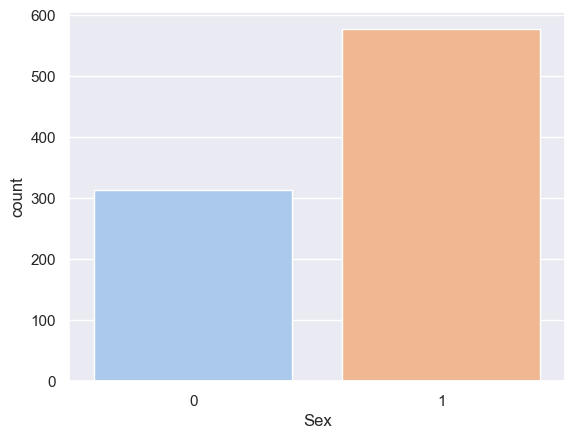

In [23]:
#making countplot for survived column
sns.countplot(x='Sex', data=df, palette='pastel')

## 1-->male,0-->female

In [24]:
#finding the no. of male and female
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

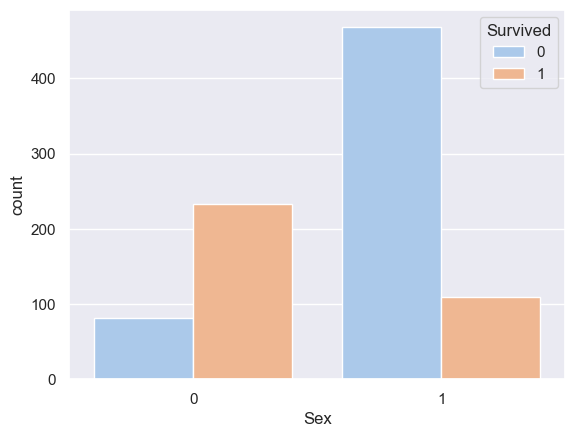

In [25]:
#no. of survivors gender wise
sns.countplot(x='Sex',hue='Survived',data=df)

In [26]:
# to get value count of above  
''' method 1:by group by
   method2: by crosstab (most readable)'''

' method 1:by group by\n   method2: by crosstab (most readable)'

In [27]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
0,81,233
1,468,109


C:\Users\ronak\AppData\Local\Temp\ipykernel_2800\1192391168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass',data=df,palette='deep')


<Axes: xlabel='Pclass', ylabel='count'>

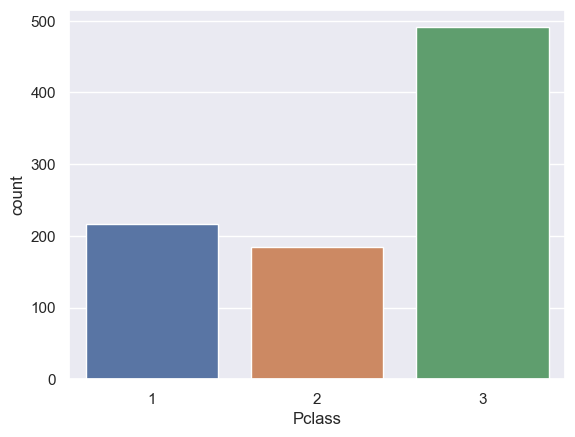

In [28]:
#making countplot for pclass
sns.countplot(x='Pclass',data=df,palette='deep')

<Axes: xlabel='Pclass', ylabel='count'>

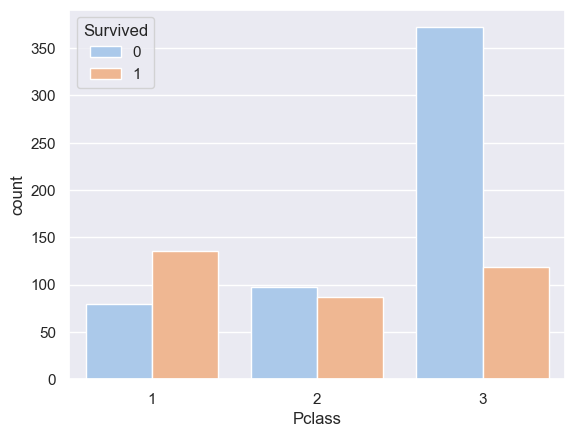

In [29]:
#no. of survivors per pclass
sns.countplot(x='Pclass',hue='Survived',data=df)

In [30]:
#value count for the above percentage wise
pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100


Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Rev
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,0


In [32]:
## checking for correlation 
corr=df.corr(numeric_only=True)

<Axes: >

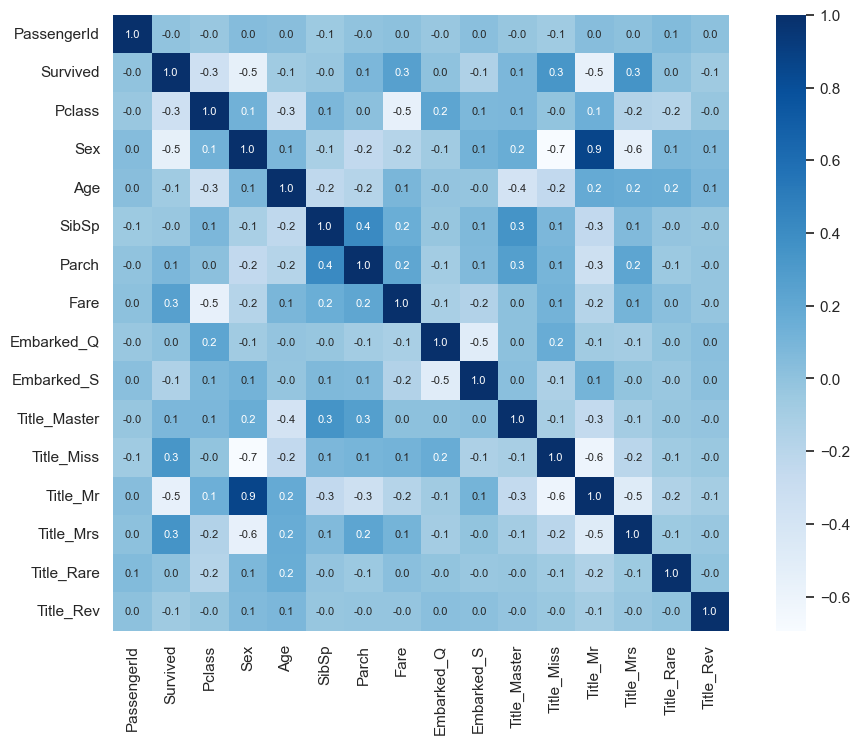

In [33]:
#creating an heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [34]:
#separating features and target
X=df.drop(columns=['PassengerId', 'Survived','Name','Ticket'],axis=1)
Y=df['Survived']

## Train/Test Split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2,stratify=Y)

In [36]:
#print the shape of X
print(X.shape,X_train.shape,X_test.shape)

(891, 14) (712, 14) (179, 14)


## Model training 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [48]:
def tune_models(X_train,X_test,y_train,y_test):
    # ============ 1. Logistic Regression (GridSearchCV) ============
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    param_grid_lr={
        'C':[0.01,0.1,1,10,100],
        'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'solver':['liblinear', 'saga', 'lbfgs']
    }
    grid_lr=GridSearchCV(LogisticRegression(max_iter=1000),
                         param_grid=param_grid_lr,cv=5,scoring='accuracy',n_jobs=-1)
    grid_lr.fit(X_train_scaled,y_train)

    # ============ 2. Decision Tree (RandomizedSearchCV) ============
    param_dist_dt={
        'max_depth':[3,5,10,None],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,4],
        'criterion':['gini','entropy']
    }
    rand_dt=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=param_dist_dt,
                               cv=5,scoring='accuracy',n_iter=10,random_state=42,n_jobs=-1)
    rand_dt.fit(X_train,y_train)

    # ============ 3. Random Forest (RandomizedSearchCV) ============
    param_dist_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    }

    rand_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist_rf,
                                 cv=5, scoring='accuracy', n_iter=15, random_state=42, n_jobs=-1)
    rand_rf.fit(X_train, y_train)


    # ============ 4. XGBoost (RandomizedSearchCV) ============
    param_dist_xgb = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1]
    }

    rand_xgb = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                  param_distributions=param_dist_xgb, cv=5,
                                  scoring='accuracy', n_iter=15, random_state=42, n_jobs=-1)
    rand_xgb.fit(X_train, y_train)

    #=====================Evaluation===============================
    models = {
        "Logistic Regression": (grid_lr.best_estimator_, X_test_scaled),
        "Decision Tree": (rand_dt.best_estimator_, X_test),
        "Random Forest": (rand_rf.best_estimator_, X_test),
        "XGBoost": (rand_xgb.best_estimator_, X_test)
    }

    for name,(model,X_eval) in models.items():
        print(f"\n🔍 {name}")
        print("Best Params:", model.get_params())
        y_pred = model.predict(X_eval)
        print("Classification Report:\n", classification_report(y_test, y_pred))
    # return all best models if needed
    return {
        "Logistic Regression": grid_lr.best_estimator_,
        "Decision Tree": rand_dt.best_estimator_,
        "Random Forest": rand_rf.best_estimator_,
        "XGBoost": rand_xgb.best_estimator_
    }

In [49]:
from sklearn.metrics import classification_report

In [50]:
best_models=tune_models(X_train,X_test,Y_train,Y_test)


🔍 Logistic Regression
Best Params: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179


🔍 Decision Tree
Best Params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Classification Report:
  

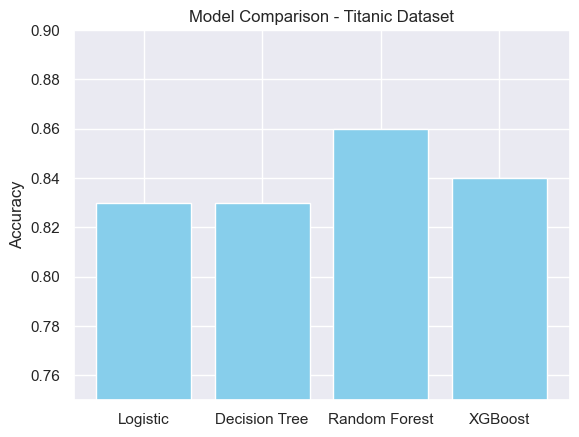

In [51]:
import matplotlib.pyplot as plt

names = ['Logistic', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [0.83, 0.83, 0.86, 0.84]

plt.bar(names, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Titanic Dataset')
plt.ylim(0.75, 0.9)
plt.show()


In [56]:
# 1. Pick your best model — let's say Random Forest
final_model = best_models['Random Forest']

# 2. Train on full training set (X_train already trained)
final_model.fit(X_train, Y_train)

# 3. Evaluate on test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = final_model.predict(X_test)

print("✅ Final Model Accuracy:", accuracy_score(Y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(Y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))


✅ Final Model Accuracy: 0.8547486033519553

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       110
           1       0.85      0.75      0.80        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179


🧱 Confusion Matrix:
 [[101   9]
 [ 17  52]]


In [57]:
import joblib
joblib.dump(best_models['Random Forest'], 'best_model_rf.pkl')


['best_model_rf.pkl']

## Now training the model on test data  for prediction

In [65]:
dtest=pd.read_csv('test.csv')

In [68]:
dtest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Rev
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,0


## doing the preprocessing on test.csv

In [70]:
#checking for missing value
dtest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [71]:
#Handling the missing values
dtest['Age'].fillna(dtest['Age'].mean(),inplace=True)

In [72]:
dtest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [73]:
#dropping Cabin Column
dtest.drop(columns='Cabin',inplace=True)

In [74]:
dtest.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [77]:
dtest['Fare'].fillna(dtest['Fare'].mean(),inplace=True)

In [78]:
#Now again checking for missing value
dtest.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [79]:
#Checking for no. of rows and columns
dtest.shape

(418, 10)

In [81]:
## Encoding the categorical variables
dtest['Sex']=le.fit_transform(dtest['Sex'])  #Male=1,Female=0

In [82]:
#one hot encoding for Embarked
dtest=pd.get_dummies(dtest,columns=['Embarked'],drop_first=True)

## Extract Features Before Encoding

In [83]:
dtest['Title']=dtest['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [84]:
dtest['Title'] = dtest['Title'].replace(['Mlle', 'Ms'], 'Miss')
dtest['Title'] = dtest['Title'].replace(['Mme', 'Lady'], 'Mrs')
dtest['Title'] = dtest['Title'].replace(['Capt', 'Col', 'Major', 'Sir', 'Jonkheer', 'Don', 'Dr'], 'Rare')

# Then encode
dtest = pd.get_dummies(dtest, columns=['Title'], drop_first=True)

In [85]:
##converting all true/false into 0/1

cols=dtest.select_dtypes(include='bool').columns
dtest[cols]=dtest[cols].astype(int)

In [86]:
dtest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Rev
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,0,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,1,0,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1,0,0,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,1,0,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,1,0,0,0,1,0,0


In [89]:
#Select features used in training
X_test2=dtest.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [90]:
bestmodel=joblib.load('best_model_rf.pkl')

In [91]:
#Prediction
y_pred=bestmodel.predict(X_test2)

In [95]:
# Create submission file
submission = pd.DataFrame({
    'PassengerId': dtest['PassengerId'],
    'Survived': y_pred
})
submission.to_csv("submission.csv", index=False)